# Mundo 27

### Análise de dados

In [1]:
import pandas as pd
import yfinance as yf  
import numpy as np

/home/vinicius/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Group by -> Separar, aplicar, combinar.

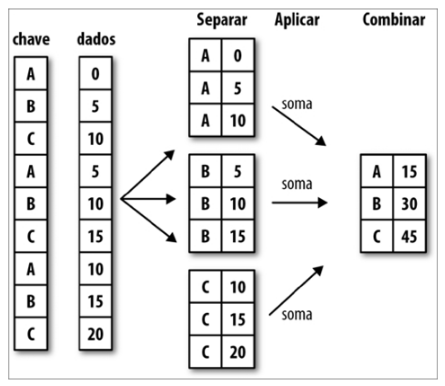

In [2]:
#groupby pra calcular retorno acum
#groupby pra calcular o retorno medio por ação
#groupby que calcula o acumulado de lucro do ano por empresa

In [3]:
dados_fundamentalistas = pd.DataFrame({"empresa": ['WEGE', 'WEGE', 'WEGE', 'WEGE',
                                                  'PETROBRAS', 'PETROBRAS', 'PETROBRAS', 'PETROBRAS'],
                                      "trimestre": ["1TRI", "2TRI", "3TRI", "4TRI"] * 2 ,
                                      "lucro": [20, 30, 40, 55, 90, 95, 105, 123]})


dados_fundamentalistas

#como calcular o lucro acumulado no ano?

,empresa,trimestre,lucro
0,WEGE,1TRI,20
1,WEGE,2TRI,30
2,WEGE,3TRI,40
3,WEGE,4TRI,55
4,PETROBRAS,1TRI,90
5,PETROBRAS,2TRI,95
6,PETROBRAS,3TRI,105
7,PETROBRAS,4TRI,123


In [4]:
dados_fundamentalistas.groupby("empresa")
dados_fundamentalistas.groupby("empresa").sum() #inferiu
dados_fundamentalistas.groupby("empresa")['trimestre'].sum()

<ipython-input-4-77980e59102e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_fundamentalistas.groupby("empresa").sum() #inferiu


empresa
PETROBRAS    1TRI2TRI3TRI4TRI
WEGE         1TRI2TRI3TRI4TRI
Name: trimestre, dtype: object

In [5]:
acoes = ['WEGE3.SA', 'VALE3.SA', 'PETR4.SA', 'LREN3.SA']

dados_acao = yf.download(acoes, "2019-08-31", "2022-08-31")['Adj Close']

retornos = dados_acao.pct_change().dropna()

retornos

[*********************100%***********************]  4 of 4 completed


,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900
2019-09-04,0.015477,0.025781,0.021968,0.019829
2019-09-05,-0.005344,0.004951,0.000000,0.006629
2019-09-06,-0.005572,0.004926,-0.001505,0.002634
2019-09-09,-0.009606,0.015460,0.031001,-0.011384
...,...,...,...,...
2022-08-24,0.008519,0.005981,-0.032189,-0.000347
2022-08-25,0.013588,-0.010702,0.019426,0.005558
2022-08-26,0.007246,0.010817,-0.015014,-0.004836


In [6]:
retornos['rent_modelo'] = retornos['WEGE3.SA'] * 0.25 + retornos['VALE3.SA'] * 0.25 + retornos['PETR4.SA'] * 0.25 + retornos['LREN3.SA'] * 0.25

retornos

#como calcular o retorno anual do nosso modelo?

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,rent_modelo
Date,,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900,-0.009103
2019-09-04,0.015477,0.025781,0.021968,0.019829,0.020764
2019-09-05,-0.005344,0.004951,0.000000,0.006629,0.001559
2019-09-06,-0.005572,0.004926,-0.001505,0.002634,0.000121
2019-09-09,-0.009606,0.015460,0.031001,-0.011384,0.006368
...,...,...,...,...,...
2022-08-24,0.008519,0.005981,-0.032189,-0.000347,-0.004509
2022-08-25,0.013588,-0.010702,0.019426,0.005558,0.006968
2022-08-26,0.007246,0.010817,-0.015014,-0.004836,-0.000447


In [7]:
retornos['ano'] = retornos.index.year

retornos

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,rent_modelo,ano
Date,,,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900,-0.009103,2019
2019-09-04,0.015477,0.025781,0.021968,0.019829,0.020764,2019
2019-09-05,-0.005344,0.004951,0.000000,0.006629,0.001559,2019
2019-09-06,-0.005572,0.004926,-0.001505,0.002634,0.000121,2019
2019-09-09,-0.009606,0.015460,0.031001,-0.011384,0.006368,2019
...,...,...,...,...,...,...
2022-08-24,0.008519,0.005981,-0.032189,-0.000347,-0.004509,2022
2022-08-25,0.013588,-0.010702,0.019426,0.005558,0.006968,2022
2022-08-26,0.007246,0.010817,-0.015014,-0.004836,-0.000447,2022


In [8]:
retornos['rent_modelo'] = 1 + retornos['rent_modelo']

retornos['rent_YTD'] = retornos.groupby('ano')['rent_modelo'].cumprod() - 1

retornos

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,rent_modelo,ano,rent_YTD
Date,,,,,,,
2019-09-03,-0.011720,0.011858,-0.010650,-0.025900,0.990897,2019,-0.009103
2019-09-04,0.015477,0.025781,0.021968,0.019829,1.020764,2019,0.011472
2019-09-05,-0.005344,0.004951,0.000000,0.006629,1.001559,2019,0.013048
2019-09-06,-0.005572,0.004926,-0.001505,0.002634,1.000121,2019,0.013171
2019-09-09,-0.009606,0.015460,0.031001,-0.011384,1.006368,2019,0.019622
...,...,...,...,...,...,...,...
2022-08-24,0.008519,0.005981,-0.032189,-0.000347,0.995491,2022,0.174900
2022-08-25,0.013588,-0.010702,0.019426,0.005558,1.006968,2022,0.183086
2022-08-26,0.007246,0.010817,-0.015014,-0.004836,0.999553,2022,0.182557


In [9]:
#agora vamos pegar o ultimo dia de cada ano

retornos.groupby('ano').tail(1)
retornos.groupby('ano').tail(1)['rent_YTD']

Date
2019-12-30    0.261954
2020-12-30    0.379288
2021-12-30   -0.059653
2022-08-30    0.149523
Name: rent_YTD, dtype: float64

In [10]:
retornos = dados_acao.pct_change().dropna()
retornos['rent_modelo'] = retornos['WEGE3.SA'] * 0.25 + retornos['VALE3.SA'] * 0.25 + retornos['PETR4.SA'] * 0.25 + retornos['LREN3.SA'] * 0.25

retornos['ano'] = retornos.index.year
retornos['mes'] = retornos.index.month

retornos['rent_modelo'] = 1 + retornos['rent_modelo']

retornos['rent_MTD'] = retornos.groupby(['ano', 'mes'])['rent_modelo'].cumprod() - 1

retornos.groupby(['ano', 'mes']).tail(1)[['ano', 'mes', 'rent_MTD']]

,ano,mes,rent_MTD
Date,,,
2019-09-30,2019,9,0.050354
2019-10-31,2019,10,0.038167
2019-11-29,2019,11,0.058393
2019-12-30,2019,12,0.093436
2020-01-31,2020,1,0.009980
2020-02-28,2020,2,-0.050906
2020-03-31,2020,3,-0.264513
2020-04-30,2020,4,0.171596
2020-05-29,2020,5,0.094698


In [11]:
#retorno diario medio por ano

retornos.groupby("ano")['rent_modelo'].mean() - 1

ano
2019    0.002925
2020    0.001797
2021   -0.000130
2022    0.000950
Name: rent_modelo, dtype: float64

# Exercícios
<BR>

* Exercício 86: Crie um programa que o usuário escolha uma ação e uma data inicial. Puxe os dados de volume da ação escolhida e calcule a média de volume mensal negociado por mês desde a data escolhida até o dia 31/08/2022. 

    Obs: a resposta deve ser em reais e o Yahoo finance disponibiliza o volume em número de ações negociadas.
<BR>
   
* Exercício 87: Com os mesmos dados de volume, calcule o volume total negoaciado por ano da ação. 

In [13]:
#gabarito 86

from datetime import datetime

acao = input("Digite um ticker da bolsa: ").upper()

acao = acao + ".SA"

data = input("Digite uma data de início (DD/MM/AAAA): ")

data = datetime.strptime(data, '%d/%m/%Y').date()

dados_acao = yf.download(acao, data, "2022-08-31")

dados_acao['volume_financeiro'] = dados_acao['Volume'] * dados_acao['Close']

dados_acao['ano'] = dados_acao.index.year
dados_acao['mes'] = dados_acao.index.month

volume_medio_mensal = dados_acao.groupby(['ano', 'mes'])['volume_financeiro'].mean()

volume_medio_mensal = volume_medio_mensal.astype(int)

print(f"O volume médio da {acao} negociado mês a mês é:")
print(volume_medio_mensal)

[*********************100%***********************]  1 of 1 completed
O volume médio da WEGE3.SA negociado mês a mês é:
ano   mes
2020  1      174318500
      2      351236136
      3      357561288
      4      251003566
      5      215523510
      6      228285859
      7      356064530
      8      354378067
      9      331418225
      10     615728720
      11     428123715
      12     380456040
2021  1      553363921
      2      538353657
      3      487301375
      4      393224671
      5      283670458
      6      267703663
      7      258210911
      8      289575397
      9      355631952
      10     299484757
      11     233450573
      12     233035307
2022  1      250964007
      2      245943317
      3      280091956
      4      259013029
      5      269399932
      6      265401649
      7      215687492
      8      202052680
Name: volume_financeiro, dtype: int64


In [14]:
#Gabarito 87

volume_total_anual = dados_acao.groupby(['ano'])['volume_financeiro'].sum()

volume_total_anual

ano
2020    8.341313e+10
2021    8.566937e+10
2022    4.150127e+10
Name: volume_financeiro, dtype: float64

# Mundo 28

Pra finalizar nosso módulo de pandas, falta uma única coisa: aprender a aplicar funções proprietárias no nosso groupby. Isso ajuda a gente, por exemplo, a calcular o máximo drawndown de uma ação. Bora lá?